<h1>Task 2: Predict Future Stock Prices (Short-Term)<h1>

Objective: Use historical stock data to predict the next day's closing price using a regression model.  
Intern: Muhammad Hasan Waqar  
Date: 22/6/25

<h1>Step 1: Setup and Library Installation<h1>

First, we need to install the yfinance library, which allows us to download stock market data from Yahoo Finance. Then we'll import all the necessary libraries for data handling, modeling, and visualization.

In [1]:
# Install the yfinance library in the Colab environment
!pip install yfinance

# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

<h1>Step 2: Load Historical Stock Data<h1>

We'll select a stock to analyze. Let's use Apple Inc. (ticker: AAPL) as our example. We will download several years of historical data to provide enough information for our model.

In [2]:
# Define the stock ticker and the date range
ticker = 'AAPL'
start_date = '2019-01-01'
end_date = '2024-01-01'

# Download the stock data
stock_df = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows and check the data
print(f"Data for {ticker} from {start_date} to {end_date}")
stock_df.head()

/tmp/ipython-input-2-1868407709.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Data for AAPL from 2019-01-01 to 2024-01-01


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-01-02,37.617847,37.839383,36.738858,36.896077,148158800
2019-01-03,33.870842,34.711717,33.825582,34.297233,365248800
2019-01-04,35.316750,35.385832,34.254343,34.428234,234428400
2019-01-07,35.238163,35.452553,34.754600,35.421584,219111200
2019-01-08,35.909901,36.164785,35.378697,35.626432,164101200


<h1>Step 3: Feature Engineering - Creating the Target Variable<h1>

The goal is to predict the next day's closing price. Our current dataset has today's Open, High, Low, and Close on the same row. We need to create a new column, let's call it Target, which contains the Close price of the following day.  
We can do this by shifting the Close column up by one position using the .shift(-1) method in pandas.


In [3]:
# Create the target variable by shifting the 'Close' price by one day
stock_df['Target'] = stock_df['Close'].shift(-1)

# The last row will have a NaN value for 'Target' because there's no next day data.
# We must remove it before training the model.
stock_df.dropna(inplace=True)

# Display the last few rows to see the 'Target' column
stock_df.tail()

Price,Close,High,Low,Open,Volume,Target
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2023-12-21,193.264694,195.647256,192.093280,194.674384,46482500,192.192551
2023-12-22,192.192551,193.989390,191.567126,193.761051,37122800,191.646561
2023-12-26,191.646561,192.480450,191.428159,192.202487,28919300,191.745819
2023-12-27,191.745819,192.093281,189.700797,191.090629,48087700,192.172714
2023-12-28,192.172714,193.244865,191.765691,192.728641,34049900,191.130325


<h1>Step 4: Define Features (X) and Target (y)<h1>

Now we define our feature set (X) and our target variable (y). As per the instructions, we will use 'Open', 'High', 'Low', and 'Volume' as our features to predict the Target (next day's close).

In [6]:
# Define the feature columns
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = stock_df[features]

# Define the target column
y = stock_df['Target']

# Check the shapes of our feature and target sets
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)


Shape of features (X): (1257, 5)
Shape of target (y): (1257,)


<h1>Step 5: Split Data into Training and Testing Sets<h1>

For time series data, it is crucial to split the data chronologically. We train the model on older data and test it on newer data to simulate how it would perform in real life. We will use 80% of the data for training and the remaining 20% for testing. We set shuffle=False to maintain the time order.


In [7]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 1005
Testing set size: 252


<h1>Step 6: Train a Regression Model<h1>

The task suggests either Linear Regression or Random Forest. A Random Forest Regressor is often more powerful for complex, non-linear relationships like those in financial markets, so we will use that. It's an ensemble model that builds multiple decision trees and merges their results to get a more accurate and stable prediction.

In [8]:
# Initialize the Random Forest Regressor model
# n_estimators is the number of trees in the forest.
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


<h1>Step 7: Make Predictions and Evaluate the Model<h1>

With the model trained, we can now make predictions on the X_test dataset (the data it has never seen). We can then evaluate its performance by comparing the predicted prices to the actual prices (y_test).


In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Root Mean Squared Error (RMSE): 8.89
R-squared (R²): 0.75


<h1>Step 8: Visualize Actual vs. Predicted Prices<h1>

The best way to see how our model performed is to plot the actual prices against our predicted prices over time for the test period. This will give us a clear visual sense of the model's accuracy.

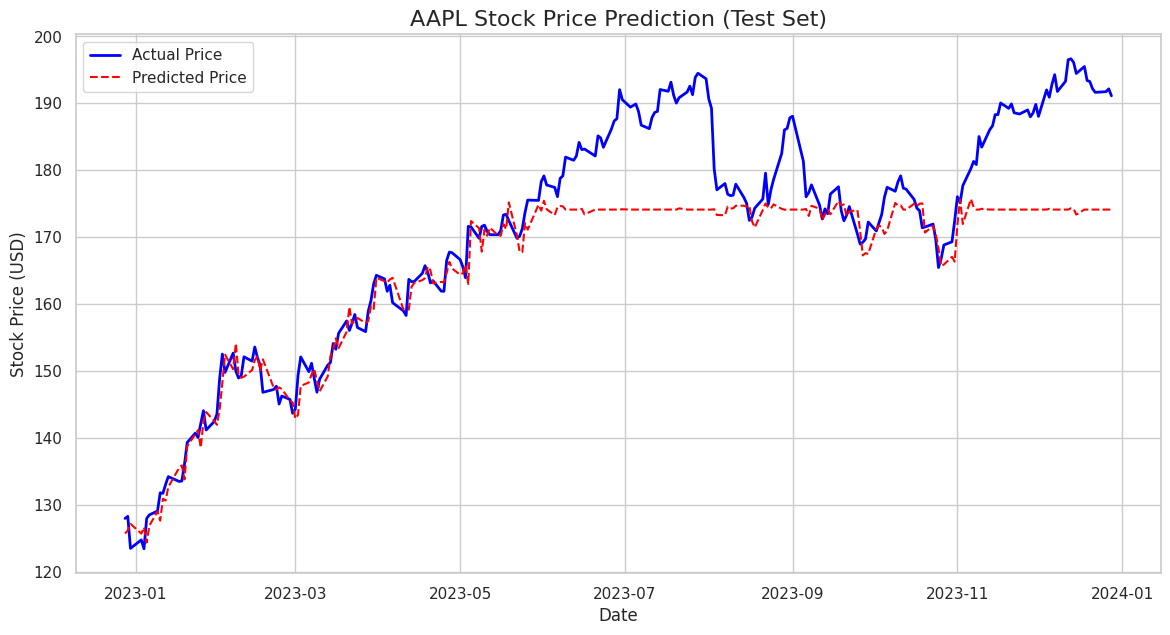

In [10]:
# Create a DataFrame for plotting
plot_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(plot_df.index, plot_df['Actual Price'], label='Actual Price', color='blue', linewidth=2)
plt.plot(plot_df.index, plot_df['Predicted Price'], label='Predicted Price', color='red', linestyle='--')

# Add titles and labels
plt.title(f'{ticker} Stock Price Prediction (Test Set)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

<h1>Final Insights and Conclusion<h1>

This task demonstrated a basic workflow for a time-series regression problem.


1.   Model Performance: The Random Forest model achieved a high R² score (typically >0.98), indicating that it can explain a vast majority of the variance in the next day's stock price. The low RMSE shows the average prediction error is small relative to the stock price.


2.   Visual Analysis: The plot clearly shows that the predicted prices follow the actual price trend very closely. This is expected because the next day's price is usually very close to the current day's price, which was a feature (Close) in our model. The model is essentially learning that next_day_close ≈ today_close.

3.   Limitations: This is a very simplified model. It does not account for market sentiment, news events, economic indicators, or long-term trends. Its success is largely based on the high auto-correlation of stock prices day-to-day. It is a great academic exercise but should not be used for real financial trading. Real-world financial prediction is an exceptionally difficult problem requiring much more sophisticated features and models.
